In [1]:
# Common helper for all notebooks — run once per notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

os.makedirs("plots", exist_ok=True)

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")

Original: 5110 rows, 12 columns

Missing values per column:
bmi                  201
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64
After missing handling + label encoding: 5110 rows, 17 columns


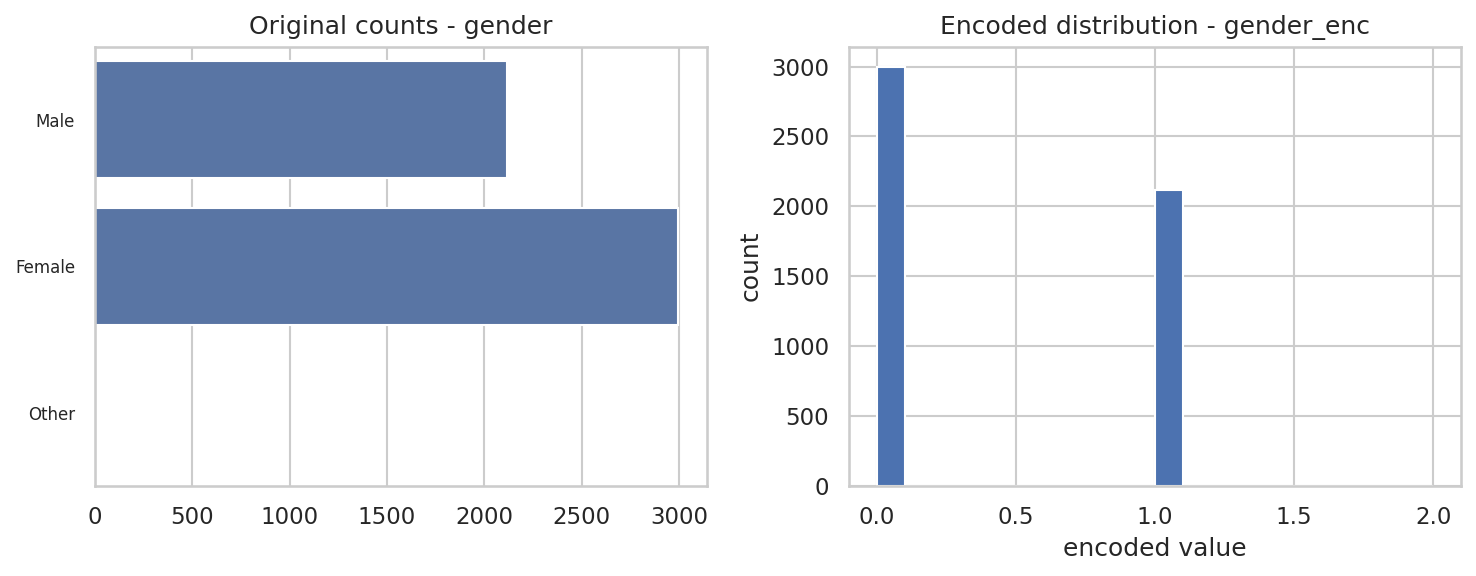

Saved: data/processed/member1_missing_labelencoded.csv


In [2]:
# Member 1 IT24101982- Ramshan M.L.M : Missing handling + label encoding
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

os.makedirs("plots", exist_ok=True)

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")


# ---------------- Load dataset ----------------
df = pd.read_csv("healthcare-dataset-stroke-data.csv")   # replace path if needed
report_shape("Original", df)

# ---------------- Missing values summary ----------------
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

# ---------------- Impute missing values ----------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Numeric → median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical → "Missing"
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# ---------------- Label encoding ----------------
label_enc = LabelEncoder()
for c in cat_cols:
    df[c + "_enc"] = label_enc.fit_transform(df[c].astype(str))

report_shape("After missing handling + label encoding", df)

# ---------------- Visualization ----------------
if cat_cols:
    c = cat_cols[0]   # take first categorical column
    fig, axes = plt.subplots(1,2, figsize=(10,4))

    sns.countplot(y=df[c], ax=axes[0])
    axes[0].set_title(f"Original counts - {c}")
    axes[0].tick_params(axis='y', labelsize=8)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")

    axes[1].hist(df[c + "_enc"], bins=20)
    axes[1].set_title(f"Encoded distribution - {c}_enc")
    axes[1].set_xlabel("encoded value")
    axes[1].set_ylabel("count")

    plt.tight_layout()
    plt.savefig("plots/member1_encoding_comparison.png")
    plt.show()

# ---------------- Save processed file ----------------
os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/member1_missing_labelencoded.csv", index=False)
print("Saved: data/processed/member1_missing_labelencoded.csv")